<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/tests/sem2cia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya (2348556)

Importing dependencies

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [211]:
def r2(actual: np.ndarray, predicted: np.ndarray):
  return r2_score(actual, predicted)
def adjr2(model, x: np.ndarray, y: np.ndarray):
  return 1 - ( 1-model.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )

In [212]:
graph = []

In [213]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0.0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1.0,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,54.0,0.0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,56.0,0.0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1.0,6,3,3,2,2,2,2


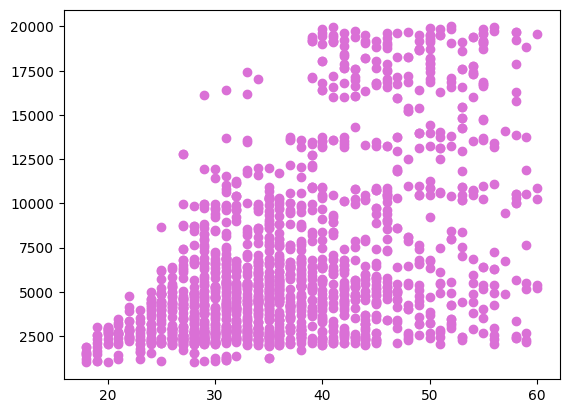

In [214]:
pt.scatter(df['Age'], df['MonthlyIncome'], color='orchid');

From the scatter plot we infer that the data exhibits a funnel shape which implies Heteroskedasticity and thus violates the assumption of linear models and therefore simple linear regression might not be the best model to use here. We will still use it as asked to prove our claim.

##Q1&2

In [215]:
x,y = df['Age'], df['MonthlyIncome']

In [216]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.34,random_state=2)

In [217]:
xy=x_train*y_train
n=len(x_train)
xmean=x_train.mean()
ymean=y_train.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x_train**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean - (m*xmean)
print('Intercept:',c,'Coefficient:',m)

Intercept: -2871.88978743024 Coefficient: 256.39799474353975


In [218]:
def line(m, c):
  ax = pt.gca()
  x = np.array(ax.get_xlim())
  y = c + m * x
  pt.plot(x, y, '-', color='red')

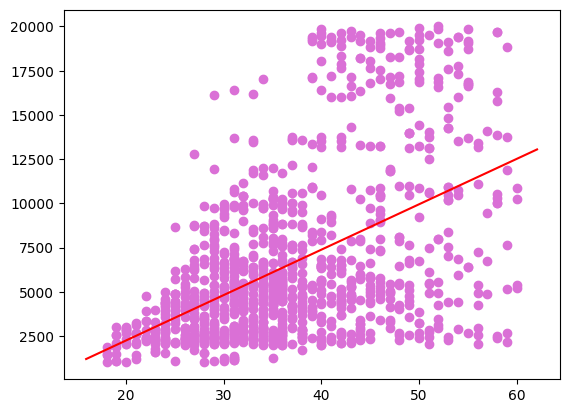

In [219]:
pt.scatter(x_train, y_train, color='orchid')
line(m,c);

##Q3

In [220]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [221]:
x = df['TotalWorkingYears']
y = df['MonthlyRate']

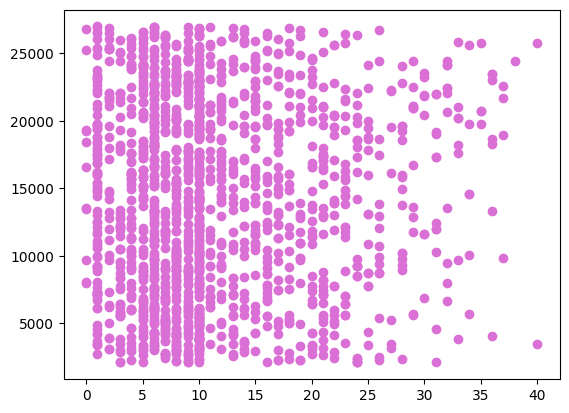

In [222]:
pt.scatter(x,y,color='orchid');

The data is all over the place and does not exhibit a near promising relationship of any kind. We would expect very low (almost zero) $R^2$ scores with polynomial regression on this data.

In [223]:
x=(x-x.mean(numeric_only=True))/x.std(numeric_only=True)

In [224]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.34,random_state=2)

In [225]:
model = LinearRegression()

In [226]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [227]:
total = 0
for i in range(1,4,1):
  p = PolynomialFeatures(degree=i,include_bias=True)
  x_trainP = p.fit_transform(x_train)
  x_testP = p.transform(x_test)
  model.fit(x_trainP, y_train)
  y_pred = model.predict(x_testP)
  sc = r2_score(y_test, y_pred)
  total += sc
  print(f'At Degree {i}, the R2 score is: ',sc)

At Degree 1, the R2 score is:  0.0006750805139827953
At Degree 2, the R2 score is:  0.0032707250370437313
At Degree 3, the R2 score is:  0.0048203480247266395


In [228]:
graph.append(total/3)

##Q4

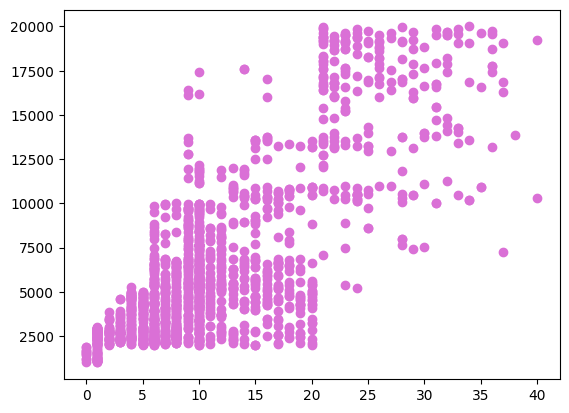

In [229]:
x = df['TotalWorkingYears']
y = df['MonthlyIncome']
pt.scatter(x,y,color='orchid');

We would expect slightly better $R^2$ scores on this one.

In [230]:
x=(x-x.mean(numeric_only=True))/x.std(numeric_only=True)
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.34,random_state=2)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [231]:
total = 0
for i in range(1,4,1):
  p = PolynomialFeatures(degree=i,include_bias=True)
  x_trainP = p.fit_transform(x_train)
  x_testP = p.transform(x_test)
  model.fit(x_trainP, y_train)
  y_pred = model.predict(x_testP)
  sc = r2_score(y_test, y_pred)
  total += sc
  print(f'At Degree {i}, the score is: ',sc)

At Degree 1, the score is:  0.6329492943590038
At Degree 2, the score is:  0.6327338792511861
At Degree 3, the score is:  0.6288373459977938


In [232]:
graph.append(total/3)

##Q5
We have done it already. Without doing this, the previous questions would not make sense.

##Q6

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [234]:
nums = df.select_dtypes(include=['float64', 'int64']).columns
dfnum = df[nums]

In [235]:
dfnum.dropna(inplace=True)

In [236]:
vif = pd.Series([variance_inflation_factor(dfnum.values,idx)
                 for idx in range(dfnum.shape[1])],
                index=dfnum.columns)
print(vif)

EmployeeID                    1.010665
Age                           2.095266
DailyRate                     1.020419
DistanceFromHome              1.016013
Education                     1.058776
EmployeeCount               364.447335
EnvironmentSatisfaction       1.011221
HourlyRate                    1.022510
JobInvolvement                1.025008
JobLevel                     11.437922
JobSatisfaction               1.018884
MonthlyIncome                11.179096
MonthlyRate                   1.017231
NumCompaniesWorked            1.255375
PercentSalaryHike             2.430097
PerformanceRating             2.429460
RelationshipSatisfaction      1.019624
StandardHours                 1.016305
Shift                         1.017992
TotalWorkingYears             4.816558
TrainingTimesLastYear         1.013355
WorkLifeBalance               1.014627
YearsAtCompany                4.482472
YearsInCurrentRole            2.703009
YearsSinceLastPromotion       1.664005
YearsWithCurrManager     

In [237]:
print('The vifs in sorted order is - ')
vif.sort_values()

The vifs in sorted order is - 


EmployeeID                    1.010665
EnvironmentSatisfaction       1.011221
TrainingTimesLastYear         1.013355
WorkLifeBalance               1.014627
DistanceFromHome              1.016013
StandardHours                 1.016305
MonthlyRate                   1.017231
Shift                         1.017992
JobSatisfaction               1.018884
RelationshipSatisfaction      1.019624
DailyRate                     1.020419
HourlyRate                    1.022510
JobInvolvement                1.025008
Education                     1.058776
NumCompaniesWorked            1.255375
YearsSinceLastPromotion       1.664005
Age                           2.095266
PerformanceRating             2.429460
PercentSalaryHike             2.430097
YearsInCurrentRole            2.703009
YearsWithCurrManager          2.823976
YearsAtCompany                4.482472
TotalWorkingYears             4.816558
MonthlyIncome                11.179096
JobLevel                     11.437922
EmployeeCount            

In [238]:
print('The top 6 predictors are - ')
vif.sort_values()[:6]

The top 6 predictors are - 


EmployeeID                 1.010665
EnvironmentSatisfaction    1.011221
TrainingTimesLastYear      1.013355
WorkLifeBalance            1.014627
DistanceFromHome           1.016013
StandardHours              1.016305
dtype: float64

##Q7

In [239]:
x = dfnum[['EmployeeID','EnvironmentSatisfaction','TrainingTimesLastYear','WorkLifeBalance','DistanceFromHome','StandardHours']]
y = dfnum['MonthlyRate']
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.34,random_state=2)
model.fit(x_train,y_train)

LinearRegression()

In [240]:
y_pred = model.predict(x_test)

In [241]:
mean_squared_error(y_test, y_pred)

51575418.64268779

In [242]:
r2_score(y_test, y_pred)

-0.0021535169911532925

In [243]:
adjr2(model, x, y)

-0.00016306703191770744

In [244]:
graph.append(r2_score(y_test, y_pred))

##Q8

In [245]:
x = dfnum['EmployeeCount']
y = dfnum['MonthlyRate']
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.34,random_state=2)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

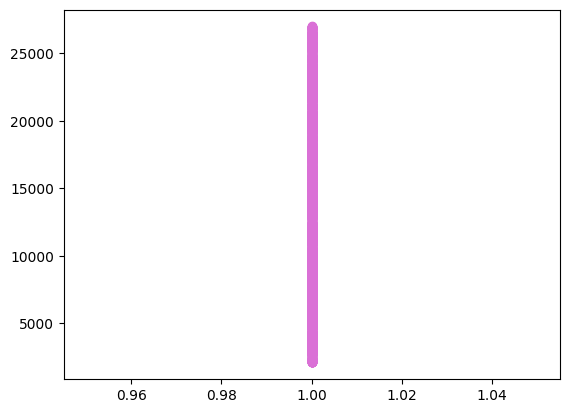

In [246]:
pt.scatter(x,y,color='orchid');

This certainly does not suit to be fitted by any kind of model. With a linear model the intercept will not exist and a constant plot does not explain any variance in the target variable.

In [247]:
total = 0
for i in range(4,7,1):
  p = PolynomialFeatures(degree=i,include_bias=True)
  x_trainP = p.fit_transform(x_train)
  x_testP = p.transform(x_test)
  model.fit(x_trainP, y_train)
  y_pred = model.predict(x_testP)
  sc = r2_score(y_test, y_pred)
  total += sc
  print(f'At Degree {i}, the score is: ',sc)

At Degree 4, the score is:  -0.0012599902148751063
At Degree 5, the score is:  -0.0012599902148751063
At Degree 6, the score is:  -0.0012599902148751063


In [248]:
graph.append(total/3)

##Q9

In [249]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [250]:
ridge = Ridge()
parameters={'alpha': np.linspace(0.01,100,1)}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train.reshape(-1,1),y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
y_pred = ridge_regressor.predict(x_test.reshape(-1,1))
print(f'The Mean Squared Error using Lasso Regression is: ', mean_squared_error(y_test, y_pred))
print(f'The R-squared error using Lasso Regression is: ', r2_score(y_test, y_pred))
# print(f'The Adjusted R-squared error using Lasso Regression is: ', adjr2(ridge_regressor, y_test.reshape(-1,1), y_pred))

{'alpha': 0.01}
-50929727.724688634
The Mean Squared Error using Lasso Regression is:  51529433.65458601
The R-squared error using Lasso Regression is:  -0.0012599902148751063


In [251]:
graph.append(r2_score(y_test, y_pred))

##Q10

In [252]:
from sklearn.linear_model import Lasso

In [253]:
lasso = Lasso()
parameters={'alpha': np.linspace(0.01,100,1)}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train.reshape(-1,1),y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
y_pred = lasso_regressor.predict(x_test.reshape(-1,1))
print(f'The Mean Squared Error using Lasso Regression is: ', mean_squared_error(y_test, y_pred))
print(f'The R-squared error using Lasso Regression is: ', r2_score(y_test, y_pred))
# print(f'The Adjusted R-squared error using Lasso Regression is: ', adjr2(lasso_regressor, y_test.reshape(-1,1), y_pred))

{'alpha': 0.01}
-50929727.724688634
The Mean Squared Error using Lasso Regression is:  51529433.65458601
The R-squared error using Lasso Regression is:  -0.0012599902148751063


In [254]:
graph.append(r2_score(y_test, y_pred))

##Q11

In [255]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 6
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)
cv_scores = cross_val_score(model, np.array(x).reshape(-1,1), y, cv=kf, scoring='r2')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: R-squared = {score:.4f}')
average_r2 = np.mean(cv_scores)
print(f'Average R-squared: {average_r2:.4f}')

Fold 1: R-squared = -0.0000
Fold 2: R-squared = -0.0025
Fold 3: R-squared = -0.0002
Fold 4: R-squared = -0.0007
Fold 5: R-squared = -0.0000
Fold 6: R-squared = -0.0016
Average R-squared: -0.0008


In [256]:
graph.append(average_r2)

##Q12
The top predictors found out earlier can be used to predict `PercentSalaryHike` because they have the minimum VIF.

##Q13
The evaluation is done wherever applicable.

##Q14
The slope and coefficient values are printed wherever applicable.

##Q15

In [259]:
graph

[0.002922051191917722,
 0.6315068398693279,
 -0.0021535169911532925,
 -0.0012599902148751063,
 -0.0012599902148751063,
 -0.0012599902148751063,
 -0.000847471101516765]

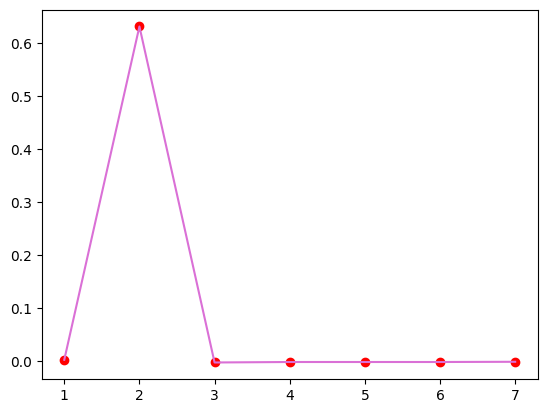

In [265]:
pt.plot([1,2,3,4,5,6,7],graph,color='orchid');
pt.scatter([1,2,3,4,5,6,7],graph,color='red');

##Inference

The inference from this notebook is that, the dataset given does not exhibit the characteristics for which linear models are applicable. There are some subtle assumptions which are violated at every step following which we have encountered pretty bad scores on an average.